In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


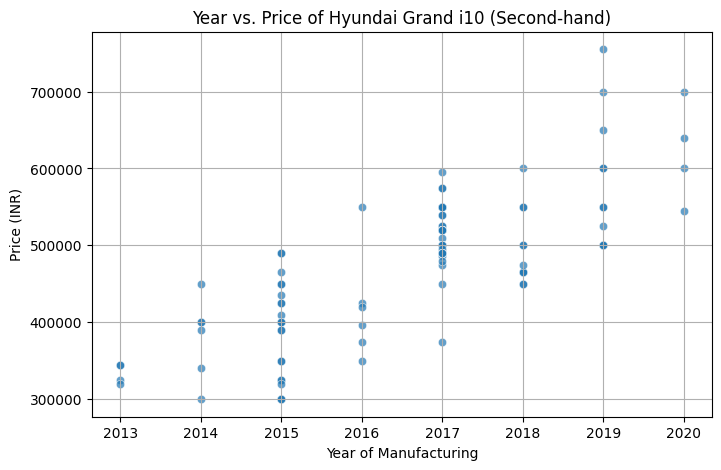

In [4]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Year"], y=df["Price"], alpha=0.7)
plt.xlabel("Year of Manufacturing")
plt.ylabel("Price (INR)")
plt.title("Year vs. Price of Hyundai Grand i10 (Second-hand)")
plt.grid(True)
plt.show()

In [5]:
X = df[["Year"]]
y = df["Price"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
linear_model = LinearRegression()
lasso_model = Lasso(alpha=1000)

In [8]:
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1000)

In [9]:
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

In [10]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [11]:
year_2022 = pd.DataFrame([[2022]], columns=["Year"])
price_2022_linear = linear_model.predict(year_2022)[0]
price_2022_lasso = lasso_model.predict(year_2022)[0]
print("Model Performance:")
print(f"Linear Regression - MSE: {mse_linear:.2f}, R²: {r2_linear:.3f}, Predicted Price (2022): ₹{price_2022_linear:.2f}")
print(f"Lasso Regression  - MSE: {mse_lasso:.2f}, R²: {r2_lasso:.3f}, Predicted Price (2022): ₹{price_2022_lasso:.2f}")

Model Performance:
Linear Regression - MSE: 4326906256.83, R²: 0.368, Predicted Price (2022): ₹743601.62
Lasso Regression  - MSE: 4281012112.63, R²: 0.374, Predicted Price (2022): ₹741359.94


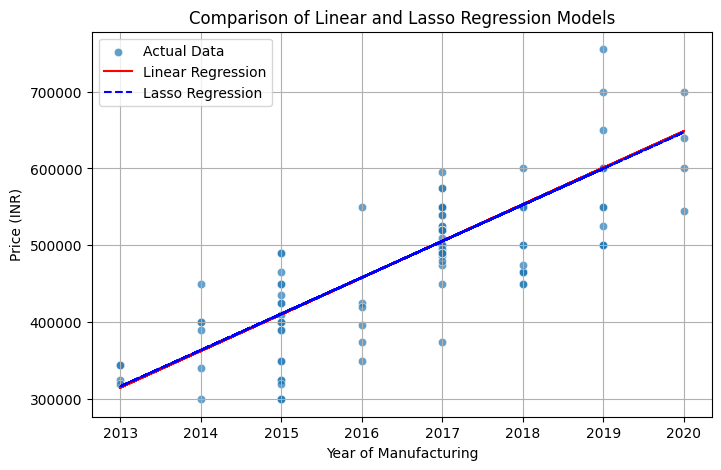

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Year"], y=df["Price"], alpha=0.7, label="Actual Data")
plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
plt.plot(X, lasso_model.predict(X), color='blue', linestyle='dashed', label='Lasso Regression')
plt.xlabel("Year of Manufacturing")
plt.ylabel("Price (INR)")
plt.title("Comparison of Linear and Lasso Regression Models")
plt.legend()
plt.grid(True)
plt.show()

####Lasso Regression is better